In [38]:


def fwd_euler(f,y0,t0,h,N):
    y = [y0]
    t = [t0]
    for i in range(N):
        y.append(y[-1] + h*f(t[-1],y[-1]))
        t.append(t[-1] + h)
    return t,y

def bwd_euler(f,y0,t0,h,N,M):
    y = [y0]
    t = [t0]
    for i in range(N):
        ynext = [y[-1]]
        for _ in range(M):
            ynext.append(y[-1] + h*f(t[-1]+h,ynext[-1]))
        y.append(y[-1] + h*f(t[-1] + h,ynext[-1]))
        t.append(t[-1] + h)
    return t,y

def implicit_trapezoid(f,y0,t0,h,N,M):
    y = [y0]
    t = [t0]
    for i in range(N):
        ynext = [y[-1]]
        for _ in range(M):
            ynext.append(y[-1] + h*f(t[-1]+h,ynext[-1]))
        y.append(y[-1] + (h/2)*(f(t[-1],y[-1])+f(t[-1]+h,ynext[-1])))
        t.append(t[-1] + h)
    return t,y

def trapezoid_euler(f,y0,t0,h,N,M):
    y = [y0]
    t = [t0]
    for i in range(N):
        y.append(y[-1] + (h/2)*(f(t[-1],y[-1])+f(t[-1]+h,y[-1] + h*f(t[-1],y[-1]))))
        t.append(t[-1] + h)
    return t,y

def implicit_midpoint(f,y0,t0,h,N,M):
    y = [y0]
    t = [t0]
    for i in range(N):
        ynext = [y[-1]]
        for _ in range(M):
            ynext.append(y[-1] + h*f(t[-1]+h,ynext[-1]))
        y.append(y[-1] + h*f(t[-1]+h/2,(y[-1] + ynext[-1])/2))
        t.append(t[-1] + h)
    return t,y

# def implicit_midpoint_alt(f,y0,t0,h,N,M):
#     y = [y0]
#     t = [t0]
#     k = 0
#     for i in range(M):ssssssssssss 
#         k = f(t[-1]+h/2,y[-1]+(h/2)*k)

#     for i in range(N):
#         k = f(t[-1]+h/2,y[-1]+(h/2)*k)
#         y.append(y[-1] + h*f(t[-1]+h/2,ynext[-1]))
#         t.append(t[-1] + h)
#     return t,y

def rk4(f,y0,t0,h,N):
    y = [y0]
    t = [t0]
    for i in range(N):
        k1 = f(t[-1],y[-1])
        k2 = f(t[-1]+h/2,y[-1]+h/2*k1)
        k3 = f(t[-1]+h/2,y[-1]+h/2*k2)
        k4 = f(t[-1]+h,y[-1]+h*k3)
        y.append(y[-1] + (h/6)*(k1 + 2*(k2 + k3) + k4))
        t.append(t[-1] + h)
    return t,y




In [57]:
def adams_bashforth(f,y0,t0,h,N):
    t,y = fwd_euler(f,y0,t0,h,1)
    for i in range(N):
        y.append(y[-1] + (3*h/2)*(f(t[-1],y[-1]) - (h/2)*f(t[-2],y[-2])))
        t.append(t[-1] + h)
    return t,y

[1.0, 1.5, 2.4375, 3.984375, 6.515625, 10.6552734375, 17.425048828125, 28.4959716796875, 46.60075378417969, 76.20832443237305, 124.62692642211914, 203.80806040763855, 333.2965570092201, 545.054963439703, 891.3530815802515, 1457.6700871204957, 2383.7939496645704, 3898.3262705779052, 6375.109607949227, 10425.50563817779, 17049.301815320654, 27881.49586965281, 45595.87368151979, 74564.99846709974, 121939.52100213958, 199413.22454116307, 326109.4827591342, 533301.6152270169, 872132.2986299419, 1426237.4697473326, 2332390.766064718, 3814264.3150356314, 6237639.28267522, 10200694.185612455, 16681657.459320191, 27280270.394008, 44612662.41589147, 72957108.52893357, 119310065.7226541, 195113157.16546965, 319077387.71657425, 521801711.53547937, 853325984.9902313, 1395482652.8200023, 2282096020.249336, 3732015038.032587, 6103133312.760277, 9980730477.699375, 16321940839.831354, 26692009505.13624, 43650652726.520035, 71383890489.19702, 116737310969.87228, 190905814730.55206, 312196929971.61505, 5

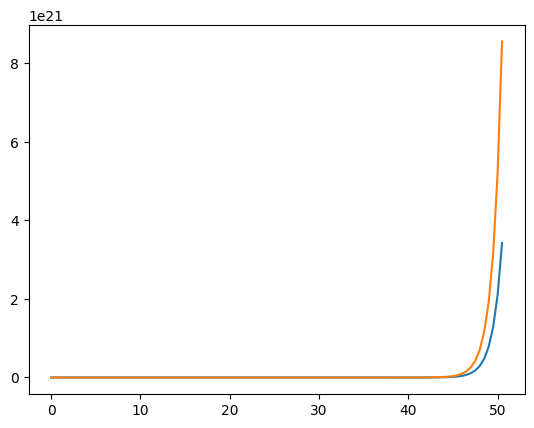

In [58]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda t,y: y
y0 = 1.0
t0 = 0.0
t,y = adams_bashforth(f,y0,t0,.5,100)
print(y)

plt.plot(t,y)
plt.plot(t,np.exp(t))